## TP noté à déposer aux formats .ipynb et .pdf sur moodle jusqu'au mardi 28 mars 17h

Nom : Normand

Prénom : Mathis

Le rapport de TP sous forme d’un fichier .ipynb et d’un fichier .pdf sera déposé sur moodle. Ces fichiers doivent contenir tous vos codes, vos sorties graphiques et/ou numériques si pertinentes et les commentaires de vos sorties. vOus pouvez rajouter autant de cellules que vous le souhaitez, que ce soient des cellules de codes ou de texte (Markdown).

Le but de ce TP est de faire une analyse descriptive d’un jeu de données des résultats de l'épreuve d'heptathlon féminin aux Jeux Olympiques de Tokyo en 2020. L'heptathlon est une combinaison de 7 épreuves d'athlétisme : 100m haies, saut en hauteur, lancer de poids, 200m, saut en longueur, lancer de javelot et 800m. Pour calculer le score et le classement final, les temps ou longueurs obtenus sont convertis en points. Le fichier hepta.csv contient les points obtenus à chaque épreuve pour chaque participante ainsi que le total.

Récupérez le fichier hepta.csv sur la page moodle du cours et sauvegardez-le dans votre répertoire de travail. Vous aurez besoin des librairies suivantes.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [43]:
def extraireQuantite(tab):
    return tab.select_dtypes(include=['float', 'int'])

Importez le jeu de données via la commande

In [44]:
hepta = pd.read_csv('hepta.csv', sep=';',decimal=',')
hepta

,Prenom,Nom,Pays,Points,100mhaies,Hauteur,Poids,200m,Longueur,Javelot,800m
0,Nafissatou,Thiam,Belgique,6791,1044,1132,849,896,1040,951,879
1,Anouk,Vetter,Pays-Bas,6689,1111,978,880,999,997,883,841
2,Emma,Oosterwegel,Pays-Bas,6590,1071,978,746,957,940,949,949
3,Noor,Vidts,Belgique,6571,1099,1016,816,1010,949,702,979
4,Kendell,Williams,Etats-Unis,6508,1129,978,688,981,1030,836,866
5,Annie,Kunz,Etats-Unis,6420,1052,978,871,969,949,721,880
6,Carolin,Schafer,Allemagne,6419,1081,978,793,949,783,940,895
7,Ivona,Dadic,Autriche,6403,1034,1016,801,949,883,829,891
8,Erica,Bougard,Etats-Unis,6369,1103,1054,707,973,868,794,880
9,Zheng,Ninali,Chine,6318,1084,978,764,928,887,717,960


### Description du jeu de données

#### 1 - Examiner le jeu de données. Combien y a-t-il d'individus ? Combien de variables quantitatives ? 

In [45]:
print(f"Il y a {hepta.shape[0]} individus")
print(f"Il y a {hepta.shape[1]-3} variables quantitatives")

Il y a 20 individus
Il y a 8 variables quantitatives


#### 2 - Représenter graphiquement dans la même fenêtre les boîtes à moustaches des 7 épreuves de l'heptathlon.

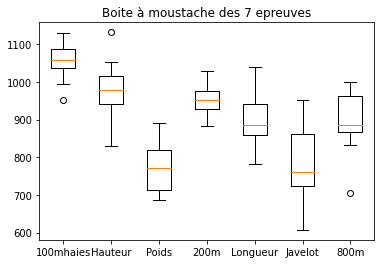

In [46]:
quantiteHepta  = extraireQuantite(hepta).iloc[:,1:]
listeEpreuve = list(quantiteHepta.columns.values)

plt.boxplot(quantiteHepta, labels = listeEpreuve)
plt.title("Boite à moustache des 7 epreuves")
plt.show()

#### 3 - Quelle épreuve a l'étendue maximale ?

grace aux boites a moustache, on voit que l'epreuve avec l'etendue maximale est le javelot

#### 4 - Quelle épreuve a la plus grande moyenne ? la plus grande variance ?

In [47]:
print(quantiteHepta.describe().iloc[1:2,:])

for i in range(len(listeEpreuve)):
    print(np.cov(list(quantiteHepta.iloc[0:,i]),list(quantiteHepta.iloc[0:,i]))[0][0], listeEpreuve[i])


      100mhaies  Hauteur  Poids    200m  Longueur  Javelot   800m
mean    1057.05    974.8  775.8  953.05    899.45   788.25  902.4
1913.102631578947 100mhaies
3878.589473684211 Hauteur
4265.852631578948 Poids
1599.1026315789475 200m
4955.523684210528 Longueur
10095.776315789473 Javelot
5410.884210526316 800m


L'epreuve avec la plus grande moyenne est 100mhaies,
L'epreuve avec la plus grande variance est le javelot

### Analyse de la liaison entre les épreuves de Lancer de Javelot et du 800m

#### 5 -  Extraire du tableau de données les variables Javelot et 800m.

In [48]:
javelot = quantiteHepta.iloc[:,5:6]
course800m = quantiteHepta.iloc[:,6:7]

#### 6 - Calculer les coefficients de la droite de régression du score au 800m en fonction du score au Javelot

In [49]:
reg = LinearRegression().fit(javelot,course800m)

#### 7 - Tracer le nuage des points du score au 800m en fonction du score au Javelot et superposer la droite de régression 

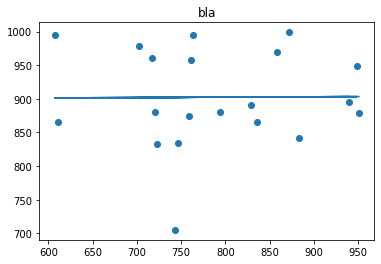

In [50]:
b1 = reg.coef_[0][0]
b0 = reg.intercept_[0]

r = reg.score(javelot,course800m)

plt.scatter(javelot,course800m)

javelotlist = quantiteHepta.iloc[:,5]
Y = javelotlist*b1 + b0
plt.plot(javelotlist, Y)

plt.title("bla")
plt.show()

#### 8 - Evaluer la qualité de l’ajustement et commenter.

In [51]:
print(r)

5.980596309551611e-05


comme r est loin de 1, donc la qualité de l'ajustement est treès mauvais

### Analyse en composante principale

#### 9 - Extraire le tableau des score des 7 épreuves (sans le score total), centrer et réduire les données et lancer l'ACP

In [52]:
scaler = StandardScaler()
scaler.fit(quantiteHepta)
Z = scaler.transform(quantiteHepta)

pca = PCA(n_components = 7)

pca.fit(Z)

acp = pca.fit_transform(Z)

#### 10 - Examiner les valeurs propres. Quel est le pourcentage de variance expliquée par les deux premiers axes ? Combien d'axes faudrait-il garder pour expliquer 90% de la variabilité des données ?

In [53]:
l = np.array(
    [ np.var(acp[: ,0]),
    np.var(acp[: ,1]),
    np.var(acp[: ,2]),
    np.var(acp[: ,3]),
    np.var(acp[: ,4]),
    np.var(acp[: ,5]),
    np.var(acp[: ,6])
    ]
)


lp = pca.explained_variance_ratio_
print(f"les valeurs propres sont {l}")

print(f"variance expliquée par composante: {lp}")

print(f"variance expliquée cumulée: {np.cumsum(l)}")

les valeurs propres sont [2.00522286 1.61251886 1.1858076  0.91975309 0.6162108  0.41946331
 0.24102348]
variance expliquée par composante: [0.28646041 0.23035984 0.16940109 0.1313933  0.08803011 0.05992333
 0.03443193]
variance expliquée cumulée: [2.00522286 3.61774172 4.80354932 5.72330241 6.33951321 6.75897652
 7.        ]


Le pourcentage de variance explique par les deux premiers axes est d'environ 52%
Il faudrait garder 5 axes pour expliquer 90% de la variabilité des données. Trois valeurs propres dépassent 1.

#### Dans toute la suite on ne gardera que les deux premiers axes.

#### 11 - Extraire les facteurs

In [54]:
Gn = pca.components_

G = np.array([ Gn [0 ,:] * np.sqrt(l[0]), Gn[1,:]*np.sqrt(l[1])])

#### 12 - Tracer le cercle des corrélation dans le premier plan factoriel pour les variables

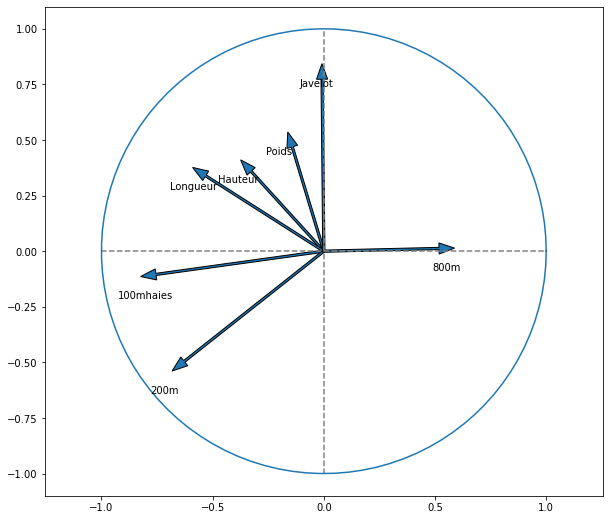

In [55]:
fig, ax = plt.subplots(figsize = (10,9))
for i in range(0,  Gn.shape[1]):
    ax.arrow(0, 0, 
             G[0, i],
             G[1, i],
            head_width = 0.05, 
            head_length = 0.07, 
            width = 0.01, length_includes_head = 1)
    plt.text(G[0, i] - 0.1, 
             G[1, i] - 0.1,
             quantiteHepta.columns[i]
            )

plt.plot([-1, 1], [0, 0], color = 'grey', ls = '--')
plt.plot([0, 0],[-1, 1], color = 'grey', ls = '--')


an = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
pass

#### Examiner le cercle des corrélations dans le premier plan factoriel des variables

#### 13 - Commentez les positions respectives des variables 800m et Javelot dans ce plan.

comme les vecteurs des deux variables javelot et 800m sont presques orthogonaux, elles sont très peu correllés

#### 14 - Commentez les positions respectives des variables 800m et 100mhaies dans ce plan.

Les vecteurs de ces deux variables sont presque opposés.

Cela veut dire que les athlètes bons au 800m on plus de chance d'être plus mauvais au 100m haies

#### 15 - Les variables Poids et Hauteur sont-elles bien représentées dans ce plan ?

Les variables Poids et Hauteur ne sont pas très bien représentées car leur module sur ce plan est environ égal à 1/2

#### 16 - Extraire les composantes principales

In [56]:
acp = pca.fit_transform(Z)

#### 17 - Tracer le nuage de point des individus projetés dans le premier plan factoriel.

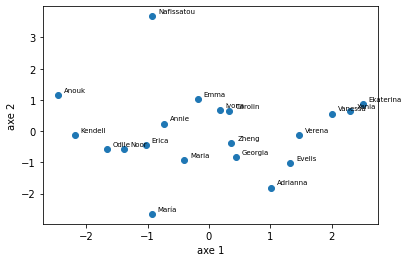

In [57]:
fig, ax = plt.subplots()
ax.scatter(acp[:, 0], acp[:, 1])
for i, label in enumerate(hepta['Prenom']):
    ax.text(acp[i, 0] + 0.1, acp[i, 1]+0.1, label, fontsize=7)


ax.set_xlabel('axe 1')
ax.set_ylabel('axe 2')
plt.show()

#### Examiner la projection des individus dans le premier plan factoriel

#### 18 - Commentez la position de Nafissatou Thiam dans le premier plan factoriel.

Nafissatou Thiam est très forte au javelot (axe des ordonnées)

#### 19 - Commentez la position d'Ekaterina Voronina, Xenia Krizsan et Vanessa Rimm dans le premier plan factoriel.

Ekaterina Voronina, Xenia Krizsan et Vanessa Rimm sont à droite du graphe et plutot au milieu de l'axe des ordonnées. elles sont donc meilleurs au 800m.

#### 20 - Commentez la position d'Anouk Vetter dans le premier plan factoriel.

Anouk Vetter est la plus à gauche de toutes les personnes, elle sera donc la meilleur au 100m haie

Quand vous avez terminé, sauvegardez votre fichier au format .ipynb et exportez-le au format .pdf. Déposez les deux fichiers sur moodle.